# From Biological to Artificial Neurons

## The Perceptron

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==0) #Iris Setosa

per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

X_new=np.array([[1,3],[2,0.4]])
y_pred=per_clf.predict(X_new)
y_pred

array([False,  True])

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss="perceptron",penalty=None,learning_rate="constant",eta0=1,random_state=42)
sgd_clf.fit(X,y)
assert (sgd_clf.coef_==per_clf.coef_).all()
assert (sgd_clf.intercept_==per_clf.intercept_).all()

## Regression MLPs

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

housing=fetch_california_housing()
X_train_full,X_test,y_full_train,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,random_state=42)


mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
model=make_pipeline(StandardScaler(),mlp_reg)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
rmse=root_mean_squared_error(y_valid,y_pred)

In [8]:
rmse

0.5053326657968762

## Classification MLPs

In [10]:
from sklearn.neural_network import MLPClassifier

X_train_full,X_test,y_full_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,test_size=0.1,random_state=42)

mlp_clf=MLPClassifier(hidden_layer_sizes=[5],max_iter=10000,random_state=42)
model=make_pipeline(StandardScaler(),mlp_clf)
model.fit(X_train,y_train)
accuracy=model.score(X_valid,y_valid)
accuracy


1.0

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [13]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

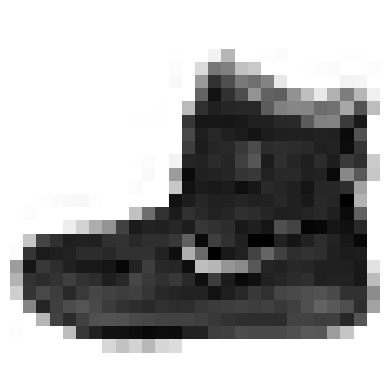

In [17]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

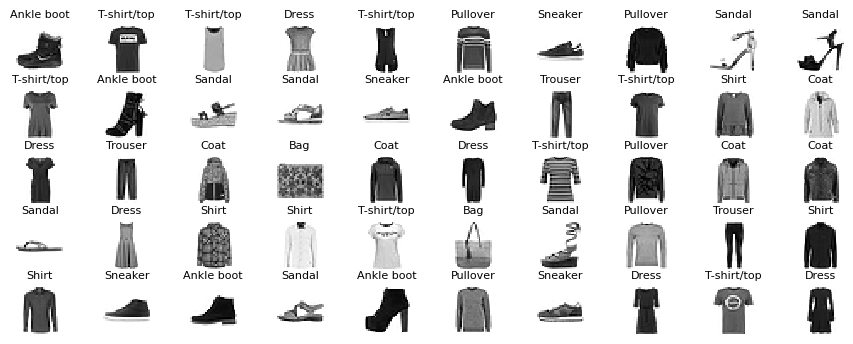

In [20]:
plt.figure(figsize=(11,4))
for idx,image_data in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx],cmap="binary",interpolation="nearest")
    plt.title(class_names[y_train[idx]],fontsize=8)
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### Creating the model using Sequential API

In [22]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

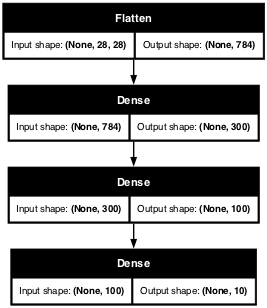

In [26]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=50)

In [27]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [28]:
hidden1=model.layers[1]

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights,biases=hidden1.get_weights()

In [31]:
weights

array([[-6.8636984e-02, -2.4114877e-02,  3.5783865e-02, ...,
         4.6367638e-02, -5.8682799e-02, -4.3020949e-02],
       [ 6.1821386e-02, -1.7650355e-02,  7.2617531e-02, ...,
         5.0272167e-02,  6.6527918e-02,  5.1280394e-02],
       [-5.4046869e-02,  5.2294344e-02,  7.2769389e-02, ...,
         4.3046594e-02, -7.1219735e-02,  1.4287978e-04],
       ...,
       [ 1.5617557e-02, -1.7769635e-05,  1.5861936e-02, ...,
        -3.5547830e-02,  5.2238330e-03, -5.4598674e-02],
       [-4.9939007e-04,  6.0459778e-02,  5.5197418e-02, ...,
        -3.3370048e-02, -4.4022106e-02,  5.7805717e-02],
       [-6.7424670e-02, -5.7352386e-02,  1.1909708e-02, ...,
         4.5479417e-02, -1.1886045e-02, -3.8607005e-02]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

#### Compiling the Model

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [37]:
#this cell is equivalent to above cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy]
             )

In [38]:
tf.keras.utils.to_categorical([2,5,6,3],num_classes=10)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [39]:
np.argmax([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
        axis=1)

array([2, 5, 6, 3])

#### Training and evaluating the model

In [41]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - loss: 0.9969 - sparse_categorical_accuracy: 0.6713 - val_loss: 0.5032 - val_sparse_categorical_accuracy: 0.8282
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - loss: 0.5063 - sparse_categorical_accuracy: 0.8268 - val_loss: 0.4544 - val_sparse_categorical_accuracy: 0.8388
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - loss: 0.4551 - sparse_categorical_accuracy: 0.8422 - val_loss: 0.4305 - val_sparse_categorical_accuracy: 0.8458
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 0.4260 - sparse_categorical_accuracy: 0.8525 - val_loss: 0.4157 - val_sparse_categorical_accuracy: 0.8514
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - loss: 0.4049 - sparse_categorical_accuracy: 0.8582 - val_loss: 0.4047 - val_sparse_categorical_accuracy: 0.8550
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - loss: 0.3881 - sparse_categorical_accuracy: 0.8636 - val_loss: 0.3950 - val_sparse_categoric

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch) 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.715005,0.761400,0.503159,0.8282
1,0.487747,0.831618,0.454383,0.8388
2,0.444459,0.845236,0.430472,0.8458
3,0.417627,0.853909,0.415663,0.8514
4,0.397747,0.860164,0.404738,0.8550


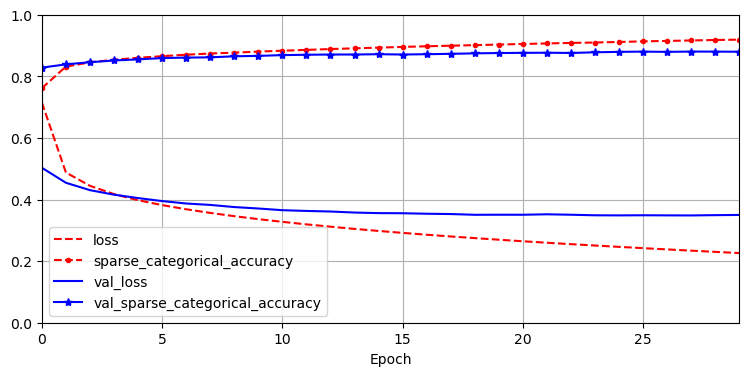

In [45]:
df.plot(figsize=(9,4),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [46]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3691 - sparse_categorical_accuracy: 0.8732


[0.36560481786727905, 0.8745999932289124]

#### Using Model to make prediction

In [48]:
X_new=X_test[:5]
y_proba=model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.02, 0.  , 0.82],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.12, 0.  , 0.  , 0.  , 0.01, 0.  , 0.87, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred=y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [51]:
y_new=y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

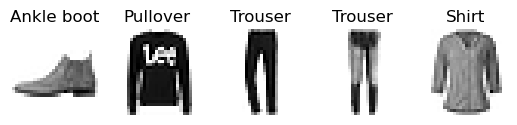

In [52]:
for idx,image in enumerate(X_new):
    plt.subplot(1,5,idx+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.title(class_names[y_test[idx]])
    plt.axis("off")
    

## Building a Regression MLP Using Sequential API

In [54]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
print(len(X_train),len(y_train))
print(len(X_valid),len(y_valid))
print(len(X_test),len(y_test))

11610 11610
3870 3870
5160 5160


In [55]:
X_train.shape

(11610, 8)

In [56]:
X_train.shape[1:]

(8,)

In [57]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name="normalization"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

norm_layer=model.get_layer("normalization")
norm_layer.adapt(X_train)
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test,rmse_test=model.evaluate(X_test,y_test)
X_new=X_test[:4]
y_pred=model.predict(X_new)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - RootMeanSquaredError: 1.2375 - loss: 1.6537 - val_RootMeanSquaredError: 1.0764 - val_loss: 1.1587
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - RootMeanSquaredError: 0.6414 - loss: 0.4121 - val_RootMeanSquaredError: 1.0605 - val_loss: 1.1246
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - RootMeanSquaredError: 0.6118 - loss: 0.3745 - val_RootMeanSquaredError: 0.7965 - val_loss: 0.6344
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - RootMeanSquaredError: 0.5956 - loss: 0.3550 - val_RootMeanSquaredError: 0.8563 - val_loss: 0.7332
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - RootMeanSquaredError: 0.5830 - loss: 0.3401 - val_RootMeanSquaredError: 0.5777 - val_loss: 0.3338
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - RootMeanSquaredError: 0.5736 - loss: 0.3291 - val_RootMeanSquaredError: 1.0593 - val_loss: 1.1221
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - RootMeanSquaredError

In [58]:
rmse_test

0.5424241423606873

In [59]:
y_pred

array([[0.5578438],
       [1.1659659],
       [5.019061 ],
       [2.6048286]], dtype=float32)

In [60]:
y_test[:4]

array([0.477  , 0.458  , 5.00001, 2.186  ])

## Building Complex Models Using Functional API

In [62]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [63]:
normalized_layer=tf.keras.layers.Normalization()
normalized_layer.adapt(X_train)
hidden_layer1=tf.keras.layers.Dense(30,activation="relu")
hidden_layer2=tf.keras.layers.Dense(30,activation="relu")
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalized_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])


In [64]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [65]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - RootMeanSquaredError: 1.6197 - loss: 2.7516 - val_RootMeanSquaredError: 0.7787 - val_loss: 0.6063
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - RootMeanSquaredError: 0.7258 - loss: 0.5282 - val_RootMeanSquaredError: 0.7113 - val_loss: 0.5059
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - RootMeanSquaredError: 0.6521 - loss: 0.4256 - val_RootMeanSquaredError: 0.7482 - val_loss: 0.5599
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - RootMeanSquaredError: 0.6255 - loss: 0.3915 - val_RootMeanSquaredError: 0.8470 - val_loss: 0.7175
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - RootMeanSquaredError: 0.6135 - loss: 0.3765 - val_RootMeanSquaredError: 0.9938 - val_loss: 0.9877
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - RootMeanSquaredError: 0.6051 - loss: 0.3663 - val_RootMeanSquaredError: 1.2354 - val_loss: 1.5262
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - RootMeanSquaredError: 0.5985 - 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(4, 8))
  warnings.warn(msg)


##### wide and deep

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [68]:
input_wide=tf.keras.layers.Input(shape=[5],name="wide_input")
input_deep=tf.keras.layers.Input(shape=[6],name="deep_input")
norm_layer_wide=tf.keras.layers.Normalization(name="wide_norm")
norm_layer_deep=tf.keras.layers.Normalization(name="deep_norm")

norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu",name="hidden1")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu",name="hidden2")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2],name="concat_layer")
output=tf.keras.layers.Dense(1,name="output")(concat)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output],name="wide_deep_output")

In [69]:
model.summary()

Model: "wide_deep_output"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_norm           │ (None, 6)         │         13 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_norm[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_norm           │ (None, 5)         │         11 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 35)        │          0 │ wide_norm[0][0],  │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concat_layer[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [70]:
X_train.shape

(11610, 8)

In [71]:
X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]

In [72]:
X_train_wide.shape

(11610, 5)

In [73]:
X_train_deep.shape

(11610, 6)

In [74]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),y_valid))
mse=model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - RootMeanSquaredError: 1.6025 - loss: 2.6517 - val_RootMeanSquaredError: 1.3608 - val_loss: 1.8518
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - RootMeanSquaredError: 0.7812 - loss: 0.6110 - val_RootMeanSquaredError: 0.7328 - val_loss: 0.5371
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - RootMeanSquaredError: 0.6985 - loss: 0.4882 - val_RootMeanSquaredError: 0.6490 - val_loss: 0.4211
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - RootMeanSquaredError: 0.6663 - loss: 0.4442 - val_RootMeanSquaredError: 0.6195 - val_loss: 0.3838
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - RootMeanSquaredError: 0.6451 - loss: 0.4163 - val_RootMeanSquaredError: 0.6283 - val_loss: 0.3948
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - RootMeanSquaredError: 0.6301 - loss: 0.3972 - val_RootMeanSquaredError: 0.5929 - val_loss: 0.3515
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - RootMeanSquaredError

##### Auxilary output

In [76]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [77]:
input_wide=tf.keras.layers.Input(shape=[5],name="wide_input")
input_deep=tf.keras.layers.Input(shape=[6],name="deep_input")
norm_layer_wide=tf.keras.layers.Normalization(name="wide_norm")
norm_layer_deep=tf.keras.layers.Normalization(name="deep_norm")
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu",name="hidden1")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu",name="hidden2")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2],name="concat_layer")
output=tf.keras.layers.Dense(1,name="main_output")(concat)
aux_output=tf.keras.layers.Dense(1,name="aux_output")(hidden2)

model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])

In [78]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_norm           │ (None, 6)         │         13 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_norm[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_norm           │ (None, 5)         │         11 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 35)        │          0 │ wide_norm[0][0],  │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concat_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ hidden2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

In [79]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse","mse"),optimizer=optimizer,loss_weights=(0.9,0.1),
              metrics=["RootMeanSquaredError","RootMeanSquaredError"])

In [80]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
                 epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - aux_output_RootMeanSquaredError: 1.8937 - aux_output_loss: 3.6653 - loss: 2.4429 - main_output_RootMeanSquaredError: 1.4902 - main_output_loss: 2.3071 - val_aux_output_RootMeanSquaredError: 1.7766 - val_aux_output_loss: 3.1549 - val_loss: 1.1356 - val_main_output_RootMeanSquaredError: 0.9545 - val_main_output_loss: 0.9108
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - aux_output_RootMeanSquaredError: 0.9218 - aux_output_loss: 0.8511 - loss: 0.5412 - main_output_RootMeanSquaredError: 0.7114 - main_output_loss: 0.5068 - val_aux_output_RootMeanSquaredError: 0.8647 - val_aux_output_loss: 0.7476 - val_loss: 0.4710 - val_main_output_RootMeanSquaredError: 0.6635 - val_main_output_loss: 0.4401
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - aux_output_RootMeanSquaredError: 0.7992 - aux_output_loss: 0.6390 - loss: 0.4610 - main_output_RootMeanSquaredError: 0.6641 - main_output_loss: 0.4413 - val_aux_output_RootMeanSquaredE

In [81]:
model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - aux_output_RootMeanSquaredError: 0.6294 - aux_output_loss: 0.3963 - loss: 0.3324 - main_output_RootMeanSquaredError: 0.5703 - main_output_loss: 0.3253


[0.33001089096069336,
 0.32292795181274414,
 0.3899538516998291,
 0.6245591044425964,
 0.5686274170875549]

  ##### 0.3300, # Total loss: 0.9 * loss_main + 0.1 * loss_aux
  ##### 0.3237, # Loss for main output (from dense_2)
  ##### 0.3853, # Loss for auxiliary output (from dense_3)
  ##### 0.5692, # RMSE for main output
  ##### 0.6206] # RMSE for auxiliary output

In [83]:
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [84]:
y_pred_main

array([[0.35357982],
       [1.3295437 ],
       [3.5184653 ]], dtype=float32)

In [85]:
y_pred_aux

array([[0.39693704],
       [1.1953485 ],
       [3.1030047 ]], dtype=float32)

In [86]:
y_pred_tuple=model.predict((X_new_wide,X_new_deep))
y_pred=dict(zip(model.output_names,y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [87]:
y_pred

{'main_output': array([[0.35357982],
        [1.3295437 ],
        [3.5184653 ]], dtype=float32),
 'aux_output': array([[0.39693704],
        [1.1953485 ],
        [3.1030047 ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models

In [89]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide=tf.keras.layers.Normalization()
        self.norm_layer_deep=tf.keras.layers.Normalization()
        self.hidden1=tf.keras.layers.Dense(units,activation=activation)
        self.hidden2=tf.keras.layers.Dense(units,activation=activation)
        self.main_output=tf.keras.layers.Dense(1)
        self.aux_output=tf.keras.layers.Dense(1)

    def call(self,inputs):
        input_wide,input_deep=inputs
        norm_wide=self.norm_layer_wide(input_wide)
        norm_deep=self.norm_layer_deep(input_deep)
        hidden1=self.hidden1(norm_deep)
        hidden2=self.hidden2(hidden1)
        concat=tf.keras.layers.concatenate([norm_wide,hidden2])
        output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return output,aux_output

tf.random.set_seed(42)
model=WideAndDeepModel(30,activation="relu",name="my_cool_model")
    

In [90]:
model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse","mse"],optimizer=optimizer,loss_weights=[0.9,0.1],
             metrics=["RootMeanSquaredError","RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
                 epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - RootMeanSquaredError: 1.6415 - RootMeanSquaredError_1: 1.9191 - loss: 2.9035 - mse_loss: 3.7886 - val_RootMeanSquaredError: 0.8678 - val_RootMeanSquaredError_1: 1.9018 - val_loss: 1.0394 - val_mse_loss: 3.6154
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - RootMeanSquaredError: 0.7418 - RootMeanSquaredError_1: 0.8611 - loss: 0.5698 - mse_loss: 0.7420 - val_RootMeanSquaredError: 0.6675 - val_RootMeanSquaredError_1: 1.2673 - val_loss: 0.5616 - val_mse_loss: 1.6054
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.6837 - RootMeanSquaredError_1: 0.7747 - loss: 0.4809 - mse_loss: 0.6003 - val_RootMeanSquaredError: 0.7140 - val_RootMeanSquaredError_1: 0.9525 - val_loss: 0.5496 - val_mse_loss: 0.9069
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - RootMeanSquaredError: 0.6574 - RootMeanSquaredError_1: 0.7455 - loss: 0.4447 - mse_loss: 0.5560 - val_RootMeanSquaredError: 0.6158 - val_RootMeanS

## Saving and Restoring Model

In [93]:
model.save("my_model.keras")

In [94]:
#Save Only Weights
model.save_weights("my_weights.weights.h5")

In [95]:
#load only weights
model.load_weights("my_weights.weights.h5")

In [96]:
load_model=tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel":WideAndDeepModel}
)

In [97]:
y_pred=load_model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [98]:
y_pred

(array([[0.55752593],
        [1.4320089 ],
        [3.5015705 ]], dtype=float32),
 array([[0.84627026],
        [1.4861267 ],
        [3.3759255 ]], dtype=float32))

## Using Callbacks

In [100]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("best_checkpoint_model.keras",
                                                save_best_only=True)
history=model.fit(
      (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - RootMeanSquaredError: 0.5723 - RootMeanSquaredError_1: 0.6139 - loss: 0.3325 - mse_loss: 0.3771 - val_RootMeanSquaredError: 0.8594 - val_RootMeanSquaredError_1: 0.6730 - val_loss: 0.7100 - val_mse_loss: 0.4529
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - RootMeanSquaredError: 0.5698 - RootMeanSquaredError_1: 0.6108 - loss: 0.3296 - mse_loss: 0.3733 - val_RootMeanSquaredError: 0.8955 - val_RootMeanSquaredError_1: 0.8683 - val_loss: 0.7972 - val_mse_loss: 0.7538
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - RootMeanSquaredError: 0.5686 - RootMeanSquaredError_1: 0.6100 - loss: 0.3282 - mse_loss: 0.3723 - val_RootMeanSquaredError: 0.9232 - val_RootMeanSquaredError_1: 0.6901 - val_loss: 0.8146 - val_mse_loss: 0.4762
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - RootMeanSquaredError: 0.5674 - RootMeanSquaredError_1: 0.6079 - loss: 0.3268 - mse_loss: 0.3698 - val_RootMeanSquaredError: 0.8237 - val_RootMeanS

In [101]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),
    epochs=100,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - RootMeanSquaredError: 0.5585 - RootMeanSquaredError_1: 0.5998 - loss: 0.3168 - mse_loss: 0.3600 - val_RootMeanSquaredError: 0.7663 - val_RootMeanSquaredError_1: 0.6889 - val_loss: 0.5760 - val_mse_loss: 0.4746
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - RootMeanSquaredError: 0.5574 - RootMeanSquaredError_1: 0.5989 - loss: 0.3155 - mse_loss: 0.3589 - val_RootMeanSquaredError: 1.1360 - val_RootMeanSquaredError_1: 1.2844 - val_loss: 1.3263 - val_mse_loss: 1.6489
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - RootMeanSquaredError: 0.5588 - RootMeanSquaredError_1: 0.6009 - loss: 0.3172 - mse_loss: 0.3614 - val_RootMeanSquaredError: 1.1446 - val_RootMeanSquaredError_1: 0.8757 - val_loss: 1.2559 - val_mse_loss: 0.7667
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - RootMeanSquaredError: 0.5586 - RootMeanSquaredError_1: 0.5987 - loss: 0.3167 - mse_loss: 0.3586 - val_RootMeanSquaredError: 0.7727 - val_RootM

In [102]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio=logs["val_loss"]/logs["loss"]
        print(f"Epoch: {epoch}, val/train: {ratio:.2f}")

In [103]:
val_train_ratio_cb=PrintValTrainRatioCallback()
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
    epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0
)

Epoch: 0, val/train: 1.25
Epoch: 1, val/train: 1.36
Epoch: 2, val/train: 1.79
Epoch: 3, val/train: 1.74
Epoch: 4, val/train: 2.90
Epoch: 5, val/train: 2.58
Epoch: 6, val/train: 3.41
Epoch: 7, val/train: 2.74
Epoch: 8, val/train: 8.16
Epoch: 9, val/train: 5.05


## Using TensorBoard for Visualization

In [105]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir)/strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir=get_run_logdir()

In [106]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name="normalization"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

norm_layer=model.get_layer("normalization")
norm_layer.adapt(X_train)
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

In [107]:
tensor_board_cb=tf.keras.callbacks.TensorBoard(run_logdir,profile_batch=(100,200))
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid),
                 callbacks=[tensor_board_cb])

Epoch 1/20


2025-07-11 09:04:59.231668: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-07-11 09:04:59.231848: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-07-11 09:04:59.232462: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


311/363 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - RootMeanSquaredError: 1.9168 - loss: 3.7730  

2025-07-11 09:04:59.575762: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-07-11 09:04:59.575775: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-07-11 09:04:59.626674: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-07-11 09:04:59.639435: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-07-11 09:04:59.641413: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_07_11_09_04_59/train/plugins/profile/2025_07_11_09_04_59/Shivams-MacBook-Air.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - RootMeanSquaredError: 1.8517 - loss: 3.5385 - val_RootMeanSquaredError: 0.9524 - val_loss: 0.9070
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - RootMeanSquaredError: 0.8890 - loss: 0.7914 - val_RootMeanSquaredError: 0.8047 - val_loss: 0.6475
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - RootMeanSquaredError: 0.8101 - loss: 0.6571 - val_RootMeanSquaredError: 0.7569 - val_loss: 0.5730
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - RootMeanSquaredError: 0.7776 - loss: 0.6054 - val_RootMeanSquaredError: 0.7248 - val_loss: 0.5253
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - RootMeanSquaredError: 0.7520 - loss: 0.5662 - val_RootMeanSquaredError: 0.7011 - val_loss: 0.4915
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - RootMeanSquaredError: 0.7308 - loss: 0.5348 - val_RootMeanSquaredError: 0.6826 - val_loss: 0.4659
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - RootMeanSquaredError: 0.7134 - 

In [108]:
from IPython.display import display,HTML
display(HTML('<a href="http://localhost:6006/">View TensorBoard</a>'))

In [109]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [111]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [112]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [113]:
import keras_tuner as kt

In [114]:
def build_model(hp):
    n_hidden=hp.Int("n_hidden",min_value=0,max_value=8,default=2)
    n_neurons=hp.Int("n_neurons",min_value=16, max_value=244)
    learning_rate=hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,
                          sampling="log")
    optimizer=hp.Choice("optimizer",values=["sgd","adam"])

    if optimizer=="sgd":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,activation="relu"))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
    return model
    

In [115]:
random_search_tunner=kt.RandomSearch(
    build_model,objective="val_accuracy",max_trials=5,overwrite=True,
    directory="my_fashion_mnist",project_name="rnd_search",seed=42)
random_search_tunner.search(X_train,y_train,epochs=10,
                            validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.8302000164985657

Best val_accuracy So Far: 0.8532000184059143
Total elapsed time: 00h 00m 59s


In [116]:
top3_models=random_search_tunner.get_best_models(num_models=3)
best_model=top3_models[0]

In [117]:
top3_params=random_search_tunner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 96,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [118]:
best_trial=random_search_tunner.oracle.get_best_trials(num_trials=1)[0]

In [119]:
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 96
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8532000184059143


In [120]:
best_trial.metrics.get_best_value("val_accuracy")

0.8532000184059143

In [121]:
best_model.fit(X_train,y_train,epochs=10,
              validation_data=(X_valid,y_valid))
test_loss,test_accuracy=best_model.evaluate(X_test,y_test)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.8787 - loss: 0.3318 - val_accuracy: 0.8528 - val_loss: 0.4064
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8820 - loss: 0.3226 - val_accuracy: 0.8550 - val_loss: 0.3998
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8848 - loss: 0.3144 - val_accuracy: 0.8558 - val_loss: 0.3993
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8875 - loss: 0.3072 - val_accuracy: 0.8580 - val_loss: 0.3912
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.8909 - loss: 0.2993 - val_accuracy: 0.8622 - val_loss: 0.3875
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8928 - loss: 0.2924 - val_accuracy: 0.8622 - val_loss: 0.3952
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8943 - loss: 0.2871 - val_accuracy: 0.8620 - val_loss: 0.3941
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8966 -

In [122]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit(self,hp,model,X,y,**kwargs):
        if hp.Boolean("normalized"):
            norm_layer=tf.keras.layers.Normalization()
            norm_layer.adapt(X)
            X=norm_layer(X)
        return model.fit(X,y,**kwargs)

In [123]:
hyperband_tuner=kt.Hyperband(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
     overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [124]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb=tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train,y_train,
                      epochs=10,
                      validation_data=(X_valid,y_valid),
                      callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 13s]
val_accuracy: 0.8245999813079834

Best val_accuracy So Far: 0.8740000128746033
Total elapsed time: 00h 06m 44s


In [125]:
from IPython.display import display,HTML
display(HTML('<a href="http://localhost:6006/">View TensorBoard</a>'))

In [126]:
%tensorboard --logdir {root_logdir}

UsageError: Line magic function `%tensorboard` not found.
